# UNIVERSIDADE FEDERAL DO MARANHÃO
# INTRODUÇÃO À COMPUTAÇÃO NEURAL
# **REDES NEURAIS CONVOLUCIONAIS**
# ALZENEIDE DUTRA 
# JULIANA SILVA

### REDE NEURAL CONVOLUCIONAL NA PRÁTICA
* NESTE TRABALHO A REDE CONVOLUCIONAL IRÁ IDENTIFICAR O NÚMERO ESCRITO A MÃO, SE É ALGUM DOS NÚMEROS ENTRE 0 E 9
* Para treino da nossa rede, nós utilizaremos o seguinte data set:
http://yann.lecun.com/exdb/mnist/


#Passos do processamento
O primeiro processamento das imagens era baseado em filtros que permitiam, por exemplo, obter as bordas de um objeto em uma imagem usando a combinação de filtros de bordas verticais e horizontais.
Matematicamente falando, o filtro de borda vertical, VEF, se definido da seguinte forma: Onde HEF representa o filtro de borda horizontal.

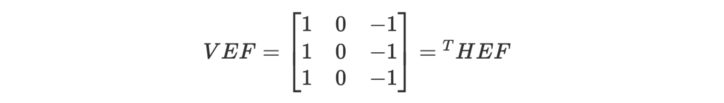

Para simplificar, consideramos a imagem A em tons de cinza 6x6, uma matriz 2D onde o valor de cada elemento representa a quantidade de luz no pixel correspondente.
Para extrair as arestas verticais desta imagem, realizamos um produto convolucional (⋆) que é basicamente a soma do produto elemento a elemento em cada bloco

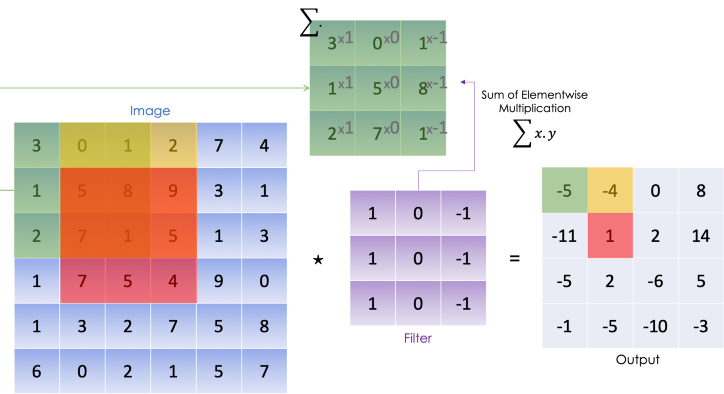

A intuição principal é definir uma rede neural que recebe a imagem como entrada e produz um alvo definido. Os parâmetros são aprendidos usando retropropagação .

# Rede Neural Convolucional

Uma rede neural convolucional é uma série de camadas convolucionais e de pooling que permitem extrair as características principais das imagens que respondem da melhor forma ao objetivo final.

# Convolução 
Depois de definir a passada e o enchimento, podemos definir o produto da convolução entre um tensor e um filtro.
Após definir previamente o produto de convolução em uma matriz 2D, que é a soma de element-wise product, podemos agora definir formalmente o produto de convolução em um volume.
Uma imagem, em geral, pode ser representada matematicamente como um tensor com as seguintes dimensões:

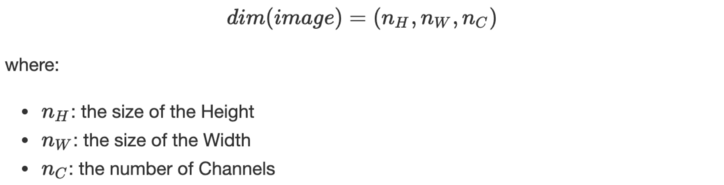

No caso de uma imagem RGB, por exemplo, n_C = 3, temos, Vermelho, Verde e Azul. Por convenção, consideramos que o filtro K é squarede tem um fodd dimension denotado , o que permite que cada pixel seja centralizado no filtro e, assim, considere todos os elementos ao seu redor.
Ao operar o produto convolucional, o filtro / kernel K deve ter o same number of channelscomo imagem, desta forma aplicamos um filtro diferente para cada canal. Assim, a dimensão do filtro é a seguinte:

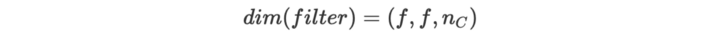

O convolutional productentre a imagem e o filtro é um 2D matrix onde cada elemento é a soma da multiplicação elemento a elemento do cubo (filtro) e o subcubo da imagem dada, conforme ilustrado abaixo:

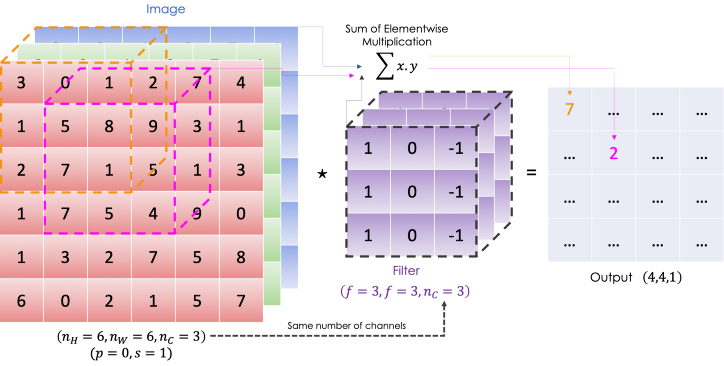

Matematicamente falando, para uma determinada imagem e filtro temos:

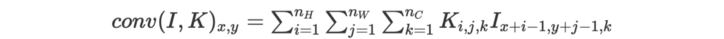

Mantendo as mesmas notações de antes, temos:

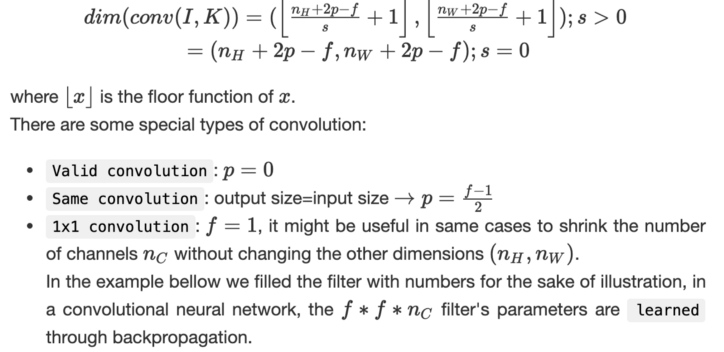

#Pooling
É a etapa de reduzir a resolução das características da imagem por meio da soma das informações. A operação é realizada através de cada canal e, portanto, afeta apenas as dimensões (n_H, n_W) e mantém n_C intacto.
Dada uma imagem, deslizamos um filtro, seguindo um determinado passo, e aplicamos uma função aos elementos selecionados. Nós temos:

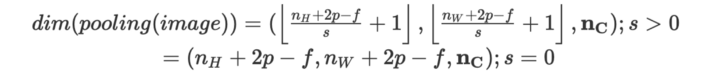

Por convenção, consideramos um filtro quadrado com tamanho f e geralmente definimos f = 2 e consideramos s = 2.

Frequentemente aplicamos:

    Average pooling: fazemos a média dos elementos presentes no filtro
    Max pooling: dados todos os elementos do filtro, retornamos o máximo



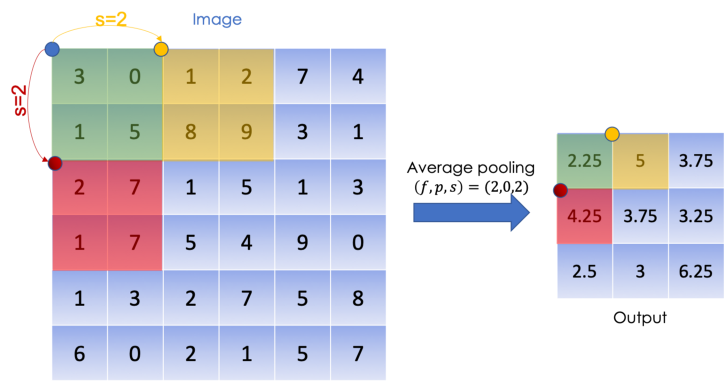

# Camada Dense - Totalmente conectada

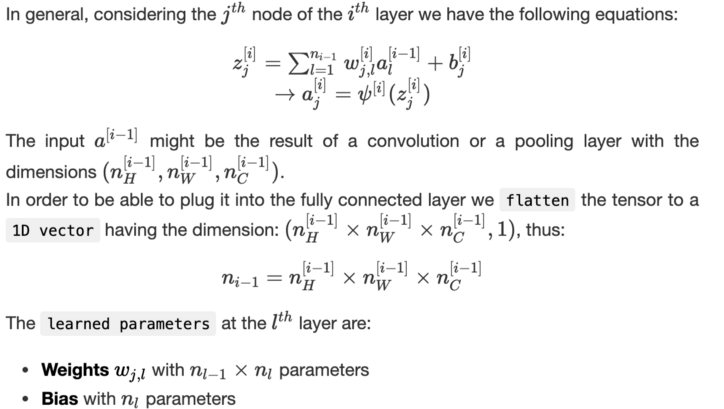

Resumimos a camada totalmente conectada na seguinte ilustração:

Para mais detalhes, você pode visitar o meu p revious artigo em redes neurais feedforward.

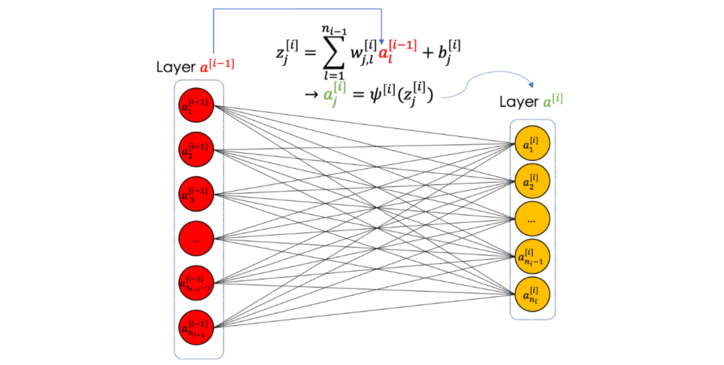

# Visão Geral

Em geral, uma rede neural convolucional é uma série de todas as operações descritas acima da seguinte forma:

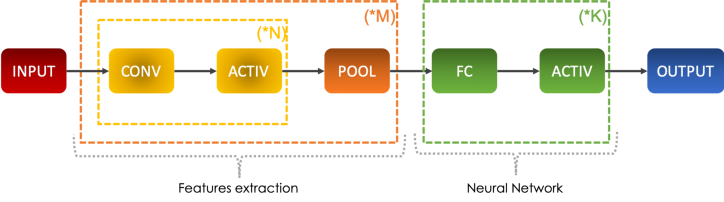

Depois de repetir uma série de convoluções seguidas por funções de ativação, aplicamos um pooling e repetimos esse processo por um certo número de vezes. Estas operações permitem a extract featurespartir da imagem que vai ser feda um neural networkdescrito por as camadas totalmente ligados os quais são regularmente seguidos por funções de activação bem.
A ideia principal é decreasen_H & n_W e increasen_C quando for mais fundo na rede.
Em 3D, uma rede neural convolucional tem a seguinte forma:

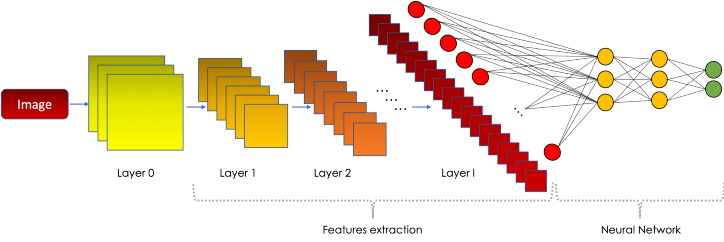

Agora vamos partir pra implementação do nosso exemplo, onde a CNN irá classificar entre 0 a 9 

# Implementação com o exemplo prático

In [ ]:
#importação das bibliotecas
import tensorflow 
from tensorflow import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import cv2
import os







* Vamos importar o datast com os números

In [ ]:
dataset = keras.datasets.mnist #carrega dataset
((imagens_treino,classe_treino),(imagens_teste,classe_teste))=dataset.load_data() #divide os dados em dados de teste e de treino

11501568/11490434 [==============================] - 0s 0us/step


* Mostrando informações a cerca dos dados

In [ ]:
#mostra informações a cerca do dataset
print("imagens de treino", len(imagens_treino))
print("imagens de treino", imagens_treino.shape)
print("imagens de teste", len(imagens_teste))
print("classe de teste", imagens_teste.shape)

print("min classe treino", classe_treino.min())
print("max classe teste", classe_treino.max())

imagens de treino 60000
imagens de treino (60000, 28, 28)
imagens de teste 10000
classe de teste (10000, 28, 28)
min classe treino 0
max classe teste 9


In [ ]:
#identifica os classificadores 
nome_classificadores = ['0', '1', '2', '3', '4', '5', '6', '7','8','9'] 
total_classificadores = 10;

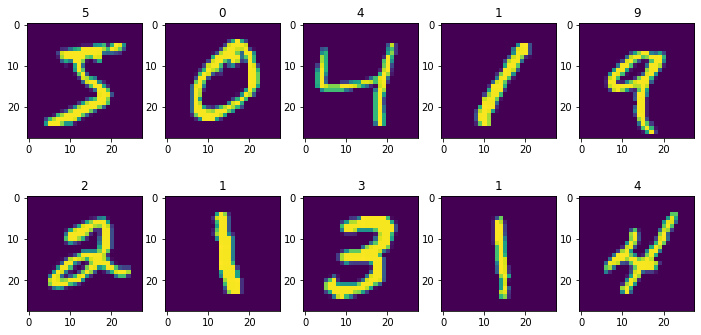

In [ ]:
#imprimir 10 digitos do dataset
fig,axes = plt.subplots(figsize=(10,5))
fig.tight_layout()

for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificadores[classe_treino[imagem]])

(60000, 28, 28)


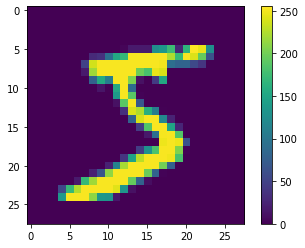

In [ ]:
#mostrando a escala de um único digito
plt.imshow(imagens_treino[0])
plt.colorbar()
print(imagens_treino.shape)

# Implementação do modelo CNN

A seguir é realizada a implementação da rede neural convolucional, conforme camadas mostradas na imagem abaixo:

In [ ]:
# é necessário fazer um tratamento na imagem antes de utilizar ela como entrada
#redefinindo o formato pra 1 vetor
imagens_treino = imagens_treino.reshape((imagens_treino.shape[0],28,28,1)) 
imagens_teste = imagens_teste.reshape((imagens_teste.shape[0],28,28,1)) 
print(imagens_treino.shape)

(60000, 28, 28, 1)


In [ ]:
#normalização
imagens_treino = imagens_treino/255
#convolução 2D -> 32 Kernels(3,3)  tamanho real do kernel, imput = imagens 28x28 em 1D pra entrada
# O model será exportado para este arquivo
filename='mnistneuralnet.h5'

#com a rede configurada, é necessário criar a rede, 
#nesta comfiguração, utilizamos a função de perda, que calcula a diferença entre a saida e a entrada 
#escolhe-se também um otimizador
#como metrica que queremos obter é a acurácia.
modelo = tensorflow.keras.models.Sequential([keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1), activation=tensorflow.nn.relu),
                           keras.layers.MaxPooling2D((2,2)),
                           keras.layers.Flatten(),
                           keras.layers.Dense(180,activation=tensorflow.nn.relu),
                           keras.layers.Dense(63,activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10,activation=tensorflow.nn.softmax)
                           ])
#compilando o modelo
adam = keras.optimizers.Adam(learning_rate=0.8)
modelo.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics='accuracy')
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 180)               973620    
_________________________________________________________________
dense_1 (Dense)              (None, 63)                11403     
_________________________________________________________________
dropout (Dropout)            (None, 63)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6

# Treino e Teste do modelo

In [ ]:
hist=modelo.fit(imagens_treino,classe_treino,epochs=5,validation_data=(imagens_teste, classe_teste), batch_size=200)

Epoch 1/5
300/300 [==============================] - 30s 96ms/step - loss: 0.2945 - accuracy: 0.9121 - val_loss: 21.2174 - val_accuracy: 0.9515
Epoch 2/5
300/300 [==============================] - 28s 95ms/step - loss: 0.0829 - accuracy: 0.9753 - val_loss: 28.4991 - val_accuracy: 0.9400
Epoch 3/5
300/300 [==============================] - 28s 95ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 18.4629 - val_accuracy: 0.9636
Epoch 4/5
300/300 [==============================] - 28s 95ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 35.6550 - val_accuracy: 0.9451
Epoch 5/5
300/300 [==============================] - 28s 95ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 20.8335 - val_accuracy: 0.9640


In [ ]:
scores = modelo.evaluate(imagens_teste, classe_teste, verbose=0)
print("\nacc: %.2f%%" % (scores[1]*100))


acc: 96.40%


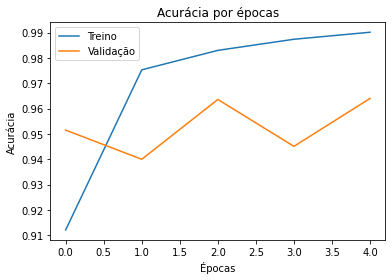

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino','Validação'])

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste,classe_teste)
print(perda_teste)
print(acuracia_teste)
teste = modelo.predict(imagens_teste/255)

313/313 [==============================] - 3s 8ms/step - loss: 20.8335 - accuracy: 0.9640
20.83354949951172
0.9639999866485596


In [ ]:
filename='mnistneuralnet.h5'
modelo.save_weights(filename)
modelo.load_weights('./{}'.format(filename) )

<Response [200]>


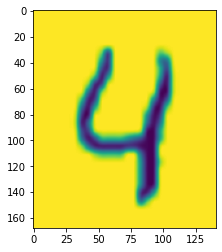

In [ ]:
import requests
from PIL import Image
url = 'https://www.classes.cs.uchicago.edu/archive/2015/spring/12300-1/digit.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)


(28, 28)


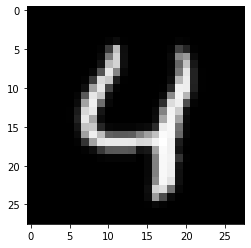

In [ ]:
import cv2 

img_array = np.asarray(img)

resized = cv2.resize(img_array, (28,28))
# Caso a imagem orginal seja colorida usar a seguinte conversão para tons de cinza 
#gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
gray_scale = resized 
image = cv2.bitwise_not(gray_scale)
print(gray_scale.shape)
plt.imshow(image,cmap=plt.get_cmap("gray") )

In [ ]:
image = image/255
image = image.reshape(1,28,28,1)

In [ ]:
predict_x=modelo.predict(image) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[4]


**Obrigada pela Atenção**